In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgt = cv2.imread('rick.jpg')
imgt = cv2.cvtColor(imgt, cv2.COLOR_BGR2RGB)

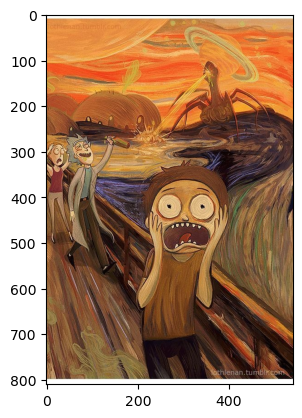

In [5]:
plt.imshow(imgt)


In [6]:
rosto = cv2.imread('morty.jpg')
rosto = cv2.cvtColor(rosto, cv2.COLOR_BGR2RGB)

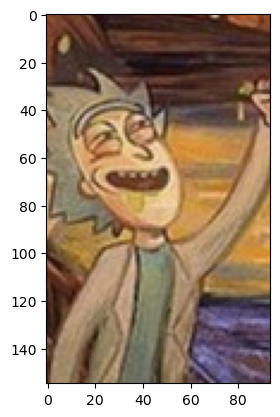

In [7]:
plt.imshow(rosto)


In [17]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [18]:
meumetodo = eval('cv2.TM_CCOEFF_NORMED')
res = cv2.matchTemplate(imgt, rosto, meumetodo) 

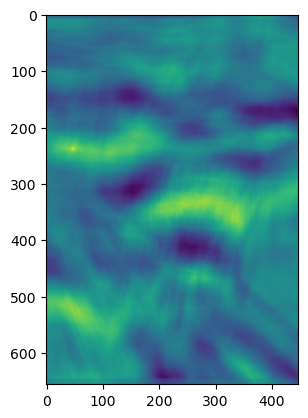

In [19]:
plt.imshow(res)

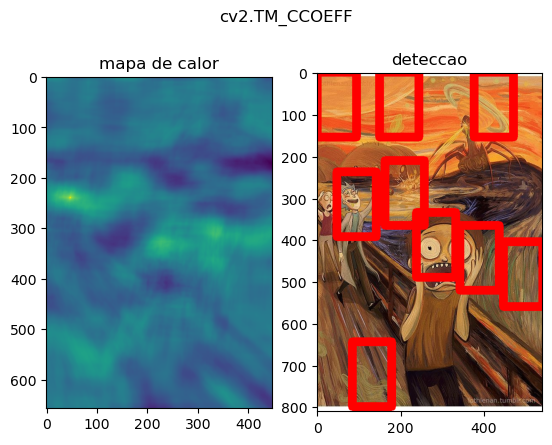

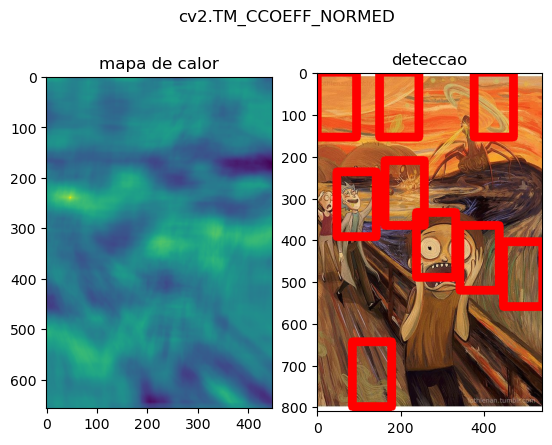

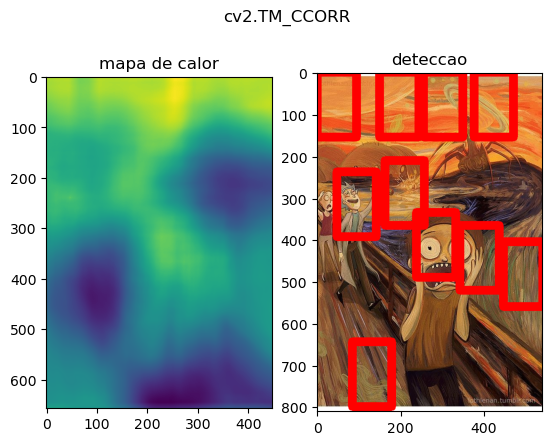

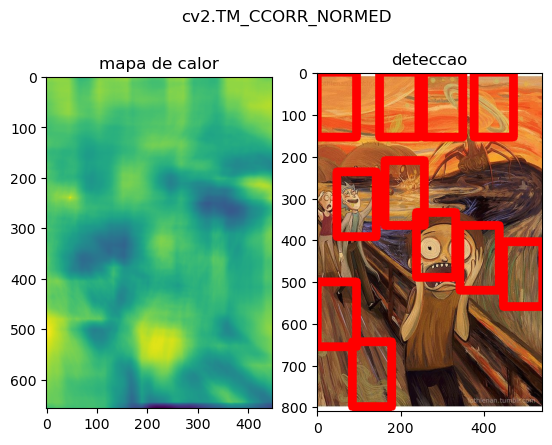

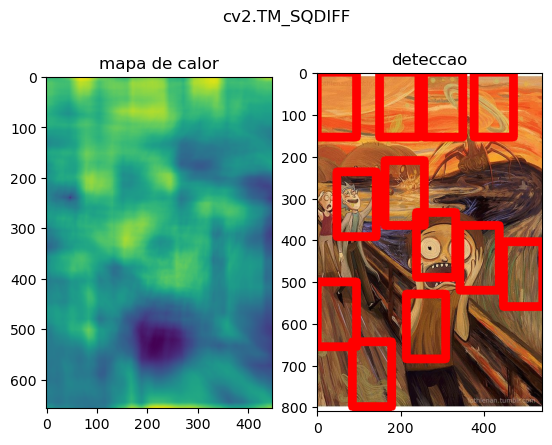

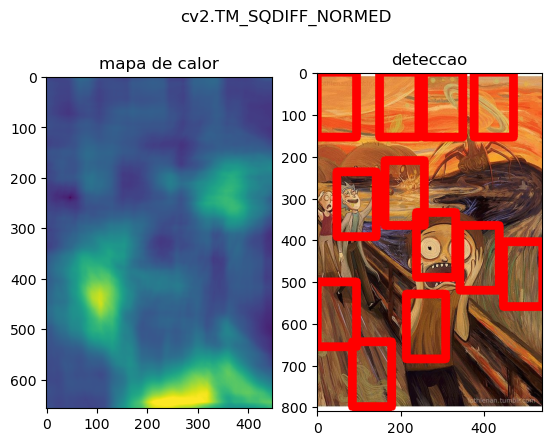

In [25]:
for m in methods:
    #criar uma copia da imagem
    copiaimgt = imgt.copy()
    
    method = eval(m)

    #template matching
    res = cv2.matchTemplate(copiaimgt, rosto,method)

    #pegar a localizacao p o retangulo
    minval, maxval, minloc, maxloc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topesq = minloc 
    else:
        topesq = maxloc

    alt, lag, canais = rosto.shape
    based = (topesq[0] + lag, topesq[1] + alt)

    cv2.rectangle(imgt, topesq, based, (255,0,0), 20)

    plt.subplot(121)
    plt.imshow(res)
    plt.title("mapa de calor")
    plt.subplot(122)
    plt.imshow(imgt)
    plt.title("deteccao")
    plt.suptitle(m)
    plt.show()
    print('\n')